In [ ]:
from cryptography.hazmat.primitives.ciphers import Cipher, algorithms, modes
from cryptography.hazmat.primitives.ciphers.algorithms import AES
from cryptography.hazmat.primitives.ciphers.modes import CBC
from cryptography.hazmat.primitives.padding import PKCS7
from cryptography.hazmat.backends import default_backend

def decrypt_aes(ciphertext, key, iv):
    backend = default_backend()
    cipher = Cipher(AES(key), CBC(iv), backend=backend)
    decryptor = cipher.decryptor()
    padded_plaintext = decryptor.update(ciphertext) + decryptor.finalize()

    # Unpad the plaintext
    unpadder = PKCS7(AES.block_size).unpadder()
    plaintext = unpadder.update(padded_plaintext) + unpadder.finalize()
    return plaintext

# The byte array you need to decrypt to find the password
ciphertext = bytes([
    90, 90, 131, 173, 3, 108, 139, 21, 101, 136, 11, 35,
    101, 154, 191, 222, 178, 128, 45, 197, 220, 65, 122,
    138, 18, 173, 210, 128, 16, 101, 247, 74
])

# Key and IV (UTF-8 bytes)
key = b'CODEBY__PASSWORD'
iv = b'IV82941840912841'

# Decrypt the ciphertext
decrypted_password = decrypt_aes(ciphertext, key, iv)
print("Decrypted password:", decrypted_password.decode('utf-8'))


Decrypted password: CODEBY{p@sSw0rd_1n_EXE_anD_DLL}


In [ ]:
import string
import random
from tqdm.notebook import tqdm

def generate_key(entrypoint):
    random.seed(entrypoint)
    letters = list(string.ascii_lowercase)
    key = list(letters)
    random.shuffle(key)
    return dict(zip(letters, key))

def decrypt(key, cipher):
    reverse_key = {v: k for k, v in key.items()}
    message = ""
    for c in cipher:
        if c in reverse_key:
            message += reverse_key[c]
        else:
            message += c
    return message

cipher = "sgwahu{sfj70d_s1pm3v_1j_4kj0_fj3xf1}"

# Перебираем все возможные значения seed
for i in tqdm(range(100000000), leave=False):  # Увеличьте это значение, если нужно проверить больше значений seed
    entrypoint = str(i)
    key = generate_key(entrypoint)
    message = decrypt(key, cipher)
    if message.startswith("codeby"):
        print(f"Seed: {entrypoint}, Message: {message}")


  0%|          | 0/100000000 [00:00<?, ?it/s]

KeyboardInterrupt: 

In [ ]:
321312.23132132131232132312// 1


321312.0

In [ ]:
import time
from sympy import isprime
import math

def miller_rabin(n):
    k= int(math.log2(n))
    # Implementation of the Miller-Rabin primality test
    if n <= 1:
        return False
    if n <= 3:
        return True
    if n % 2 == 0:
        return False

    # Write n as d*2^r + 1
    r, d = 0, n - 1
    while d % 2 == 0:
        d //= 2
        r += 1

    # Witness loop
    import random
    for _ in range(k):
        a = random.randrange(2, n - 1)
        x = pow(a, d, n)
        if x == 1 or x == n - 1:
            continue
        for _ in range(r - 1):
            x = pow(x, 2, n)
            if x == n - 1:
                break
        else:
            return False
    return True

def aks(n):
    # Implementation of the AKS primality test
    if n <= 1:
        return False
    return isprime(n)

# Test number for primality
test_number = 215231234111111111111111111111111111111111113124837247832456781547683125487125642154786325487261548763254682158462517846352164583724586712438571248762167453678124578621543872154786325148761328432671451678235412876453178625478613546738458125437845913943986439874389794378976412678432984517864578945378654786543785437865876578643875438754378645678453786876376384111028987474312189632189763421789647819264978126748192368419256749382154319285431276943125967431254637125831254832154317826548317265432187435278124567412538754831765417862417568256741857641327561243586743576417856413276984312968431289761432984321897413298041230981243894370124389431207914230932640317826437081264321807453087645631807943128743218741237894235971423768888888888888888438912541328941923783242498194938219084162390461238794631287964817924657386912564769125478961548796154786315248761254761548971593415493198649831756497865249785139856498137649812364987326498761254987126498126498216498126349871649783628791634789640231640312640218643078126430718264780192460172846120784610432384061987354689716435981763249816958471253981235489732154789631254789631254978362154923187541982735431928451239786542318976452318745263178453214871254132

# Measure time for Miller-Rabin
start_time = time.time()
miller_rabin_result = miller_rabin(test_number)
miller_rabin_time = time.time() - start_time

# Measure time for AKS
start_time = time.time()
aks_result = aks(test_number)
aks_time = time.time() - start_time

miller_rabin_result, miller_rabin_time, aks_result, aks_time


(False, 0.00019097328186035156, False, 0.0001246929168701172)

In [ ]:
import numpy as np
import sympy
import time

def aks_manual(n):
    # Manual implementation of the AKS primality test using numpy for vectorized operations
    # Simplified and highly unoptimized version, mainly checking perfect powers and gcd
    if n == 2:
        return True
    if n % 2 == 0 or n == 1:
        return False

    # Check if n is a perfect power: n = a^b for a > 1 and b > 1
    logn = np.log2(n)
    for b in range(2, int(logn)+1):
        a = int(n**(1/b))
        if pow(a, b) == n:
            return False

    # Try to find the smallest r such that ord_r(n) > (log n)^2
    max_k = int(logn**2)
    next_r = True
    r = 1
    while next_r and r <= max_k:
        r += 1
        k = 1
        next_r = False
        while k <= max_k and not next_r:
            if pow(n, k, r) == 1 or pow(n, k, r) == 0:
                next_r = True
            k += 1

    # Check that gcd(a, n) = 1 for all 1 <= a <= r
    for a in range(1, r+1):
        if np.gcd(a, n) > 1:
            return False

    return True

# Generate a smaller set of random numbers for this test due to complexity of the AKS algorithm
np.random.seed(0)
test_numbers = np.random.randint(2, high=10000, size=1000)

# Manual AKS
start_time = time.time()
manual_results = np.array([aks_manual(num) for num in test_numbers])
manual_time = time.time() - start_time

# Sympy AKS
start_time = time.time()
sympy_results = np.array([sympy.isprime(num) for num in test_numbers])
sympy_time = time.time() - start_time

np.array_equal(manual_results, sympy_results), manual_time, sympy_time


TypeError: unsupported operand type(s) for ** or pow(): 'numpy.int64', 'int', 'int'

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader

# Установим устройства для вычислений
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Определим архитектуру генератора
class Generator(nn.Module):
    def __init__(self):
        super(Generator, self).__init__()
        self.main = nn.Sequential(
            nn.Linear(100, 256),
            nn.LeakyReLU(0.2, inplace=True),
            nn.Linear(256, 512),
            nn.LeakyReLU(0.2, inplace=True),
            nn.Linear(512, 1024),
            nn.LeakyReLU(0.2, inplace=True),
            nn.Linear(1024, 28*28),
            nn.Tanh()
        )

    def forward(self, input):
        return self.main(input).view(-1, 1, 28, 28)

# Определим архитектуру дискриминатора
class Discriminator(nn.Module):
    def __init__(self):
        super(Discriminator, self).__init__()
        self.main = nn.Sequential(
            nn.Linear(28*28, 1024),
            nn.LeakyReLU(0.2, inplace=True),
            nn.Dropout(0.3),
            nn.Linear(1024, 512),
            nn.LeakyReLU(0.2, inplace=True),
            nn.Dropout(0.3),
            nn.Linear(512, 256),
            nn.LeakyReLU(0.2, inplace=True),
            nn.Dropout(0.3),
            nn.Linear(256, 1),
            nn.Sigmoid()
        )

    def forward(self, input):
        return self.main(input.view(-1, 28*28))

# Инициализируем сети
generator = Generator().to(device)
discriminator = Discriminator().to(device)

# Установим оптимизаторы и функцию потерь
lr = 0.0002
optim_g = optim.Adam(generator.parameters(), lr=lr)
optim_d = optim.Adam(discriminator.parameters(), lr=lr)
criterion = nn.BCELoss()

# Загрузим данные MNIST
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize([0.5], [0.5])])
train_dataset = datasets.MNIST(root='./data', train=True, transform=transform, download=True)
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)

# Обучение GAN
num_epochs = 50
for epoch in range(num_epochs):
    for i, (real_images, _) in enumerate(train_loader):
        batch_size = real_images.size(0)
        real_images = real_images.to(device)

        # Создаем метки
        real_labels = torch.ones(batch_size, 1).to(device)
        fake_labels = torch.zeros(batch_size, 1).to(device)

        # Обучаем дискриминатор
        outputs = discriminator(real_images)
        d_loss_real = criterion(outputs, real_labels)
        real_score = outputs

        z = torch.randn(batch_size, 100).to(device)
        fake_images = generator(z)
        outputs = discriminator(fake_images)
        d_loss_fake = criterion(outputs, fake_labels)
        fake_score = outputs

        d_loss = d_loss_real + d_loss_fake
        optim_d.zero_grad()
        d_loss.backward()
        optim_d.step()

        # Обучаем генератор
        z = torch.randn(batch_size, 100).to(device)
        fake_images = generator(z)
        outputs = discriminator(fake_images)
        g_loss = criterion(outputs, real_labels)

        optim_g.zero_grad()
        g_loss.backward()
        optim_g.step()

        if (i+1) % 200 == 0:
            print(f'Epoch [{epoch}/{num_epochs}], Step [{i+1}/{len(train_loader)}], d_loss: {d_loss.item():.4f}, g_loss: {g_loss.item():.4f}, D(x): {real_score.mean().item():.4f}, D(G(z)): {fake_score.mean().item():.4f}')


Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 9912422/9912422 [00:00<00:00, 37404711.83it/s]


Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 28881/28881 [00:00<00:00, 1187767.87it/s]

Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw



Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 1648877/1648877 [00:00<00:00, 9832997.64it/s]


Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 4542/4542 [00:00<00:00, 9587583.68it/s]

Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



Epoch [0/50], Step [200/938], d_loss: 1.6120, g_loss: 1.8897, D(x): 0.6671, D(G(z)): 0.5868
Epoch [0/50], Step [400/938], d_loss: 1.4860, g_loss: 0.8909, D(x): 0.6572, D(G(z)): 0.5567
Epoch [0/50], Step [600/938], d_loss: 0.4088, g_loss: 3.7711, D(x): 0.7612, D(G(z)): 0.1102
Epoch [0/50], Step [800/938], d_loss: 1.5379, g_loss: 0.6775, D(x): 0.5425, D(G(z)): 0.5500
Epoch [1/50], Step [200/938], d_loss: 0.5847, g_loss: 2.0646, D(x): 0.7707, D(G(z)): 0.2431
Epoch [1/50], Step [400/938], d_loss: 2.0872, g_loss: 0.7835, D(x): 0.5994, D(G(z)): 0.6960
Epoch [1/50], Step [600/938], d_loss: 1.1863, g_loss: 0.7163, D(x): 0.7090, D(G(z)): 0.5286
Epoch [1/50], Step [800/938], d_loss: 0.3413, g_loss: 2.6666, D(x): 0.8495, D(G(z)): 0.1333
Epoch [2/50], Step [200/938], d_loss: 0.9743, g_loss: 2.0510, D(x): 0.7929, D(G(z)): 0.2530
Epoch [2/50], Step [400/938], d_loss: 0.7581, g_loss: 1.5493, D(x): 0.8271, D(G(z)): 0.3504
Epoch [2/50], Step [600/938], d_loss: 0.3130, g_loss: 2.6708, D(x): 0.9075, D(G(

KeyboardInterrupt: 

In [ ]:
import matplotlib.pyplot as plt
import torchvision

# Функция для отображения изображений
def show_images(images, num_images):
    images = images.view(images.size(0), 1, 28, 28)
    grid = torchvision.utils.make_grid(images, nrow=num_images, normalize=True)
    plt.figure(figsize=(num_images, num_images))
    plt.imshow(grid.cpu().numpy().transpose((1, 2, 0)))
    plt.show()

# Генерация новых изображений
num_images = 16  # Количество изображений для генерации
z = torch.randn(num_images, 100).to(device)  # Генерация случайного шума
fake_images = generator(z)  # Генерация изображений

# Отображение сгенерированных изображений
show_images(fake_images, num_images)


Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 9912422/9912422 [00:00<00:00, 16279111.50it/s]


Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 28881/28881 [00:00<00:00, 486568.85it/s]


Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 1648877/1648877 [00:00<00:00, 3837082.02it/s]


Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 4542/4542 [00:00<00:00, 9041541.89it/s]


Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw

Epoch [0/50], Step [200/938], d_loss: 0.0015, g_loss: 7.3128, D(x): 0.9993, D(G(z)): 0.0008
Epoch [0/50], Step [400/938], d_loss: 0.0039, g_loss: 8.0049, D(x): 0.9971, D(G(z)): 0.0009
Epoch [0/50], Step [600/938], d_loss: 0.0017, g_loss: 7.8240, D(x): 0.9998, D(G(z)): 0.0014
Epoch [0/50], Step [800/938], d_loss: 0.0010, g_loss: 7.8455, D(x): 0.9996, D(G(z)): 0.0006
Epoch [1/50], Step [200/938], d_loss: 0.0998, g_loss: 3.4163, D(x): 0.9714, D(G(z)): 0.0654
Epoch [1/50], Step [400/938], d_loss: 0.1851, g_loss: 3.2856, D(x): 0.8976, D(G(z)): 0.0659
Epoch [1/50], Step [600/938], d_loss: 0.3911, g_loss: 1.9865, D(x): 0.8368, D(G(z)): 0.1406
Epoch [1/50], Step [800/938], d_loss: 0.3349, g_loss: 2.7870, D(x): 0.8079, D(G(z)): 0.0802
Epoch [2/50], Step [200/938], d_loss: 0.1545, g_loss: 3.1919, D(x): 0.9286, D(G(z)): 0.0698
Epoch [2/50], Step [400/938], d_loss: 0.4700, g_loss: 3.5503, D(x): 0.7402, D(G(z)): 0.0830
Epoch

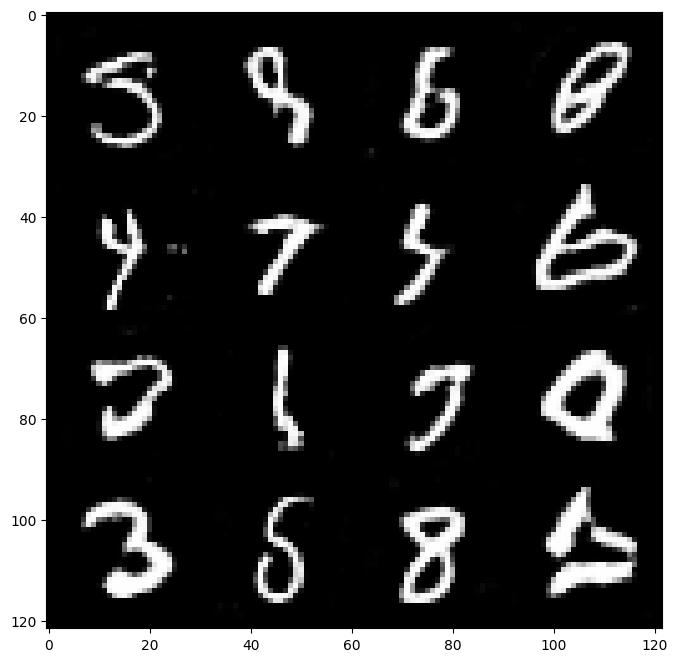

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader

# Установим устройства для вычислений
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Определим архитектуру генератора
class Generator(nn.Module):
    def __init__(self):
        super(Generator, self).__init__()
        self.main = nn.Sequential(
            nn.ConvTranspose2d(100, 128, kernel_size=7, stride=1, padding=0, bias=False),
            nn.BatchNorm2d(128),
            nn.ReLU(True),
            nn.ConvTranspose2d(128, 64, kernel_size=4, stride=2, padding=1, bias=False),
            nn.BatchNorm2d(64),
            nn.ReLU(True),
            nn.ConvTranspose2d(64, 1, kernel_size=4, stride=2, padding=1, bias=False),
            nn.Tanh()
        )

    def forward(self, input):
        return self.main(input)

# Определим архитектуру дискриминатора
class Discriminator(nn.Module):
    def __init__(self):
        super(Discriminator, self).__init__()
        self.main = nn.Sequential(
            nn.Conv2d(1, 64, kernel_size=4, stride=2, padding=1, bias=False),
            nn.LeakyReLU(0.2, inplace=True),
            nn.Conv2d(64, 128, kernel_size=4, stride=2, padding=1, bias=False),
            nn.BatchNorm2d(128),
            nn.LeakyReLU(0.2, inplace=True),
            nn.Flatten(),
            nn.Linear(128*7*7, 1),
            nn.Sigmoid()
        )

    def forward(self, input):
        return self.main(input)

# Инициализируем сети
generator = Generator().to(device)
discriminator = Discriminator().to(device)

# Установим оптимизаторы и функцию потерь
lr = 0.0002
optim_g = optim.Adam(generator.parameters(), lr=lr)
optim_d = optim.Adam(discriminator.parameters(), lr=lr)
criterion = nn.BCELoss()

# Загрузим данные MNIST
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize([0.5], [0.5])])
train_dataset = datasets.MNIST(root='./data', train=True, transform=transform, download=True)
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)

# Обучение GAN
num_epochs = 50
for epoch in range(num_epochs):
    for i, (real_images, _) in enumerate(train_loader):
        batch_size = real_images.size(0)
        real_images = real_images.to(device)

        # Создаем метки
        real_labels = torch.ones(batch_size, 1).to(device)
        fake_labels = torch.zeros(batch_size, 1).to(device)

        # Обучаем дискриминатор
        outputs = discriminator(real_images)
        d_loss_real = criterion(outputs, real_labels)
        real_score = outputs

        z = torch.randn(batch_size, 100, 1, 1).to(device)
        fake_images = generator(z)
        outputs = discriminator(fake_images.detach())
        d_loss_fake = criterion(outputs, fake_labels)
        fake_score = outputs

        d_loss = d_loss_real + d_loss_fake
        optim_d.zero_grad()
        d_loss.backward()
        optim_d.step()

        # Обучаем генератор
        outputs = discriminator(fake_images)
        g_loss = criterion(outputs, real_labels)

        optim_g.zero_grad()
        g_loss.backward()
        optim_g.step()

        if (i+1) % 200 == 0:
            print(f'Epoch [{epoch}/{num_epochs}], Step [{i+1}/{len(train_loader)}], d_loss: {d_loss.item():.4f}, g_loss: {g_loss.item():.4f}, D(x): {real_score.mean().item():.4f}, D(G(z)): {fake_score.mean().item():.4f}')


import matplotlib.pyplot as plt
import torchvision

# Функция для отображения изображений
def show_images(images, num_images):
    grid = torchvision.utils.make_grid(images, nrow=int(num_images**0.5), normalize=True)
    plt.figure(figsize=(8, 8))
    plt.imshow(grid.cpu().numpy().transpose((1, 2, 0)))
    plt.show()

# Генерация новых изображений
num_images = 16  # Количество изображений для генерации
z = torch.randn(num_images, 100, 1, 1).to(device)  # Генерация случайного шума
fake_images = generator(z)  # Генерация изображений

# Отображение сгенерированных изображений
show_images(fake_images, num_images)
